In [40]:
%%capture
%run final_chars_classification.ipynb



In [49]:
%run table_detector.ipynb

In [42]:
%run final_functions.ipynb

In [43]:
%run preprocessing.ipynb

In [44]:
%run get_rows_number.ipynb

In [45]:
# initialize_models(True)
load_models()

In [46]:
from tabular import tabular

In [53]:
# img = cv2.imread("") 

# get_letters(img, verbose =True)


ValueError: too many values to unpack (expected 2)

In [47]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, showTrace)#, table= True)

        letters = [classify(i, is_letter=True) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        solver.solve(cells=numbers,num_col=col_num,num_outputs=2)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        return [get_table(expression) for expression in expressions]

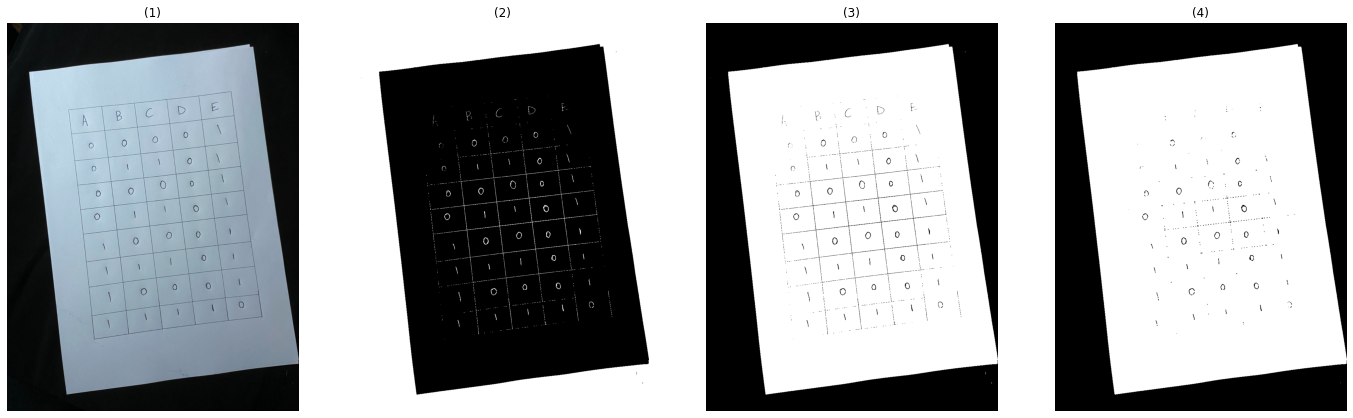

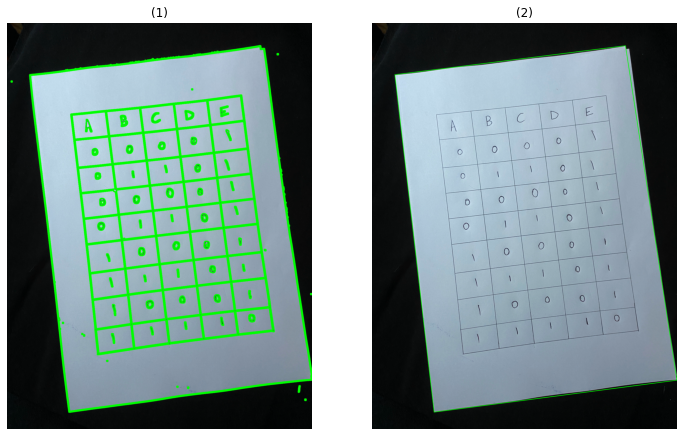

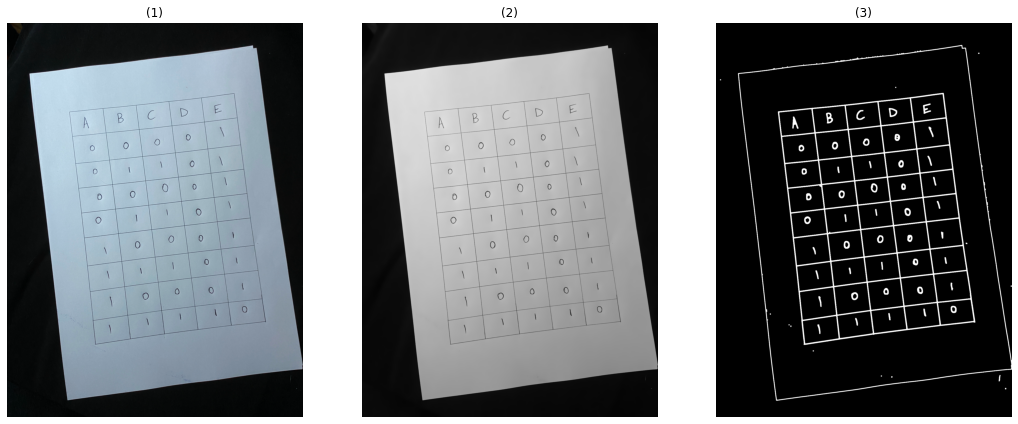

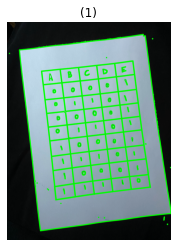

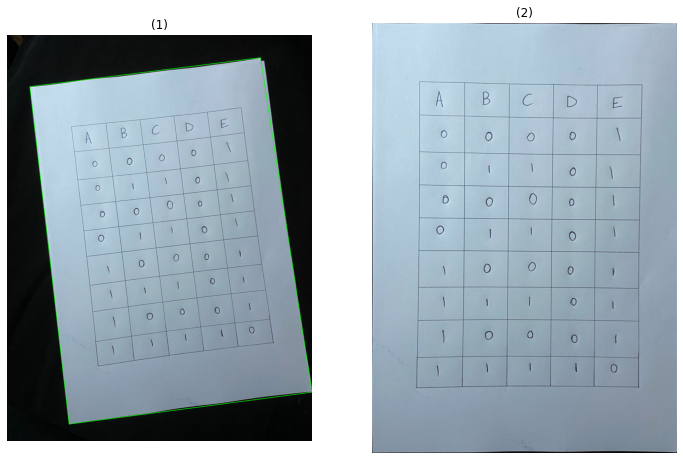

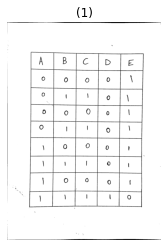

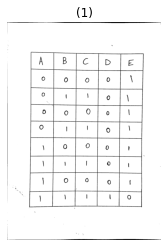

count rows 9
45
5 9


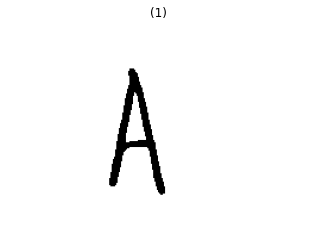

254 1965
183 2778


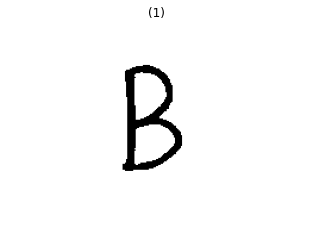

251 1965
183 2778


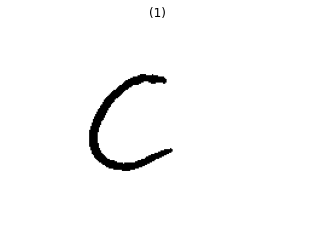

249 1965
180 2778


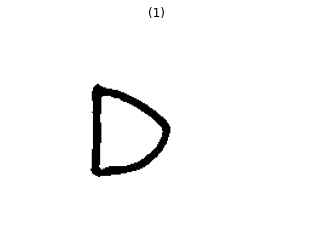

247 1965
180 2778


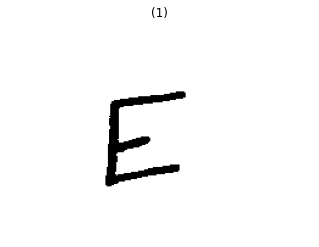

251 1965
179 2778


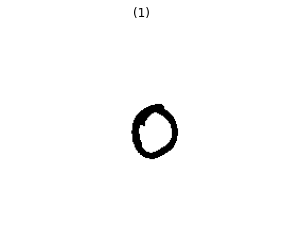

254 1965
205 2778


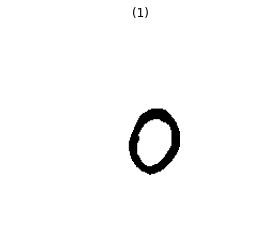

250 1965
204 2778


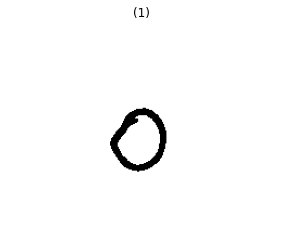

248 1965
201 2778


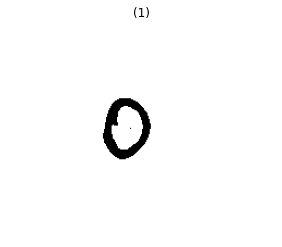

247 1965
200 2778


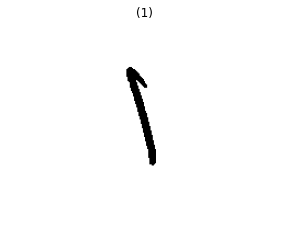

251 1965
199 2778


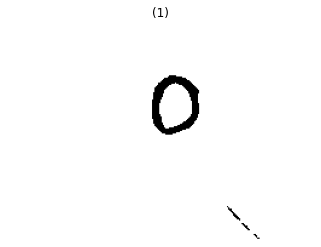

254 1965
180 2778


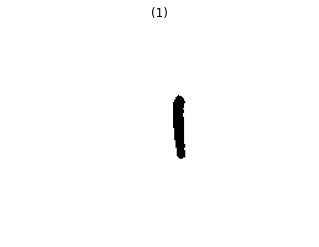

248 1965
177 2778


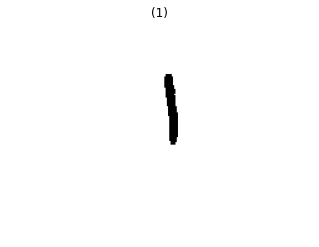

247 1965
176 2778


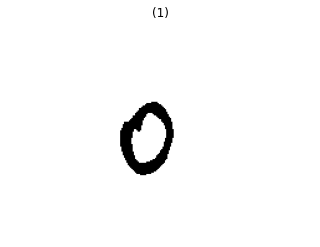

246 1965
175 2778


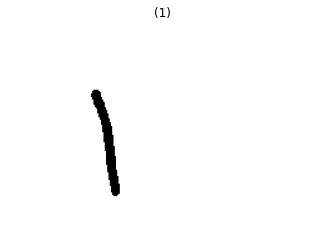

249 1965
174 2778


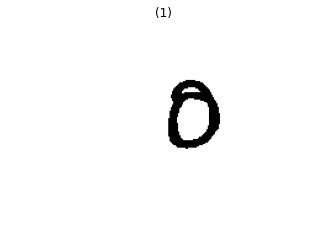

255 1965
177 2778


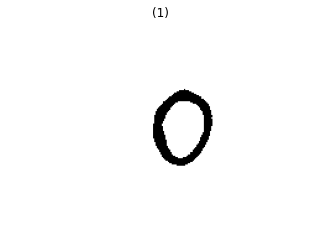

248 1965
176 2778


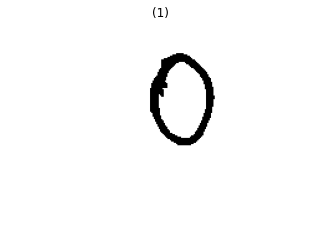

246 1965
175 2778


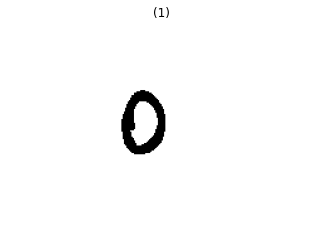

245 1965
173 2778


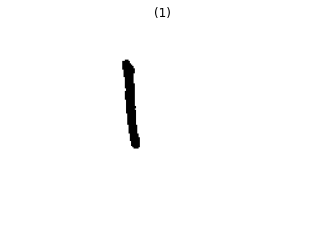

249 1965
174 2778


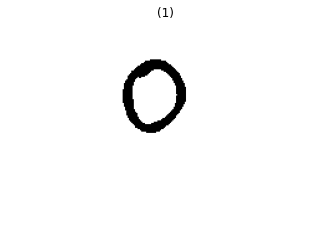

255 1965
175 2778


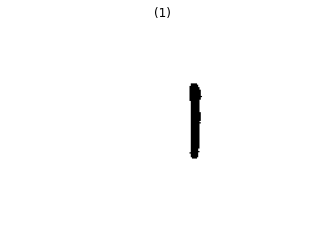

248 1965
174 2778


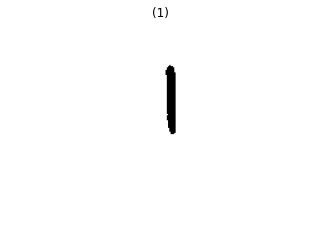

244 1965
173 2778


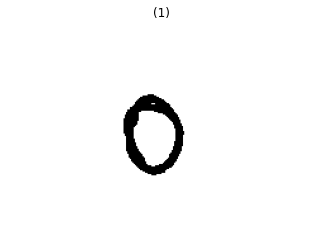

244 1965
172 2778


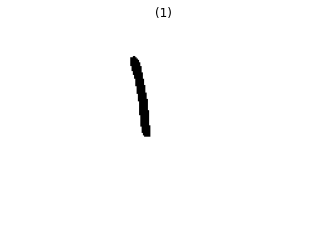

248 1965
173 2778


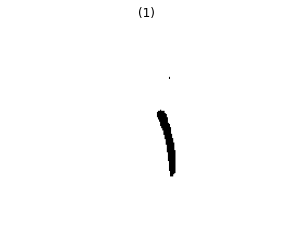

255 1965
199 2778


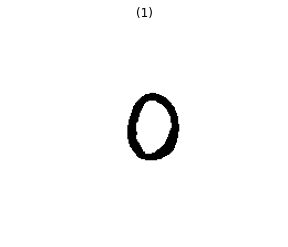

248 1965
197 2778


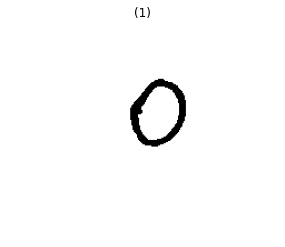

244 1965
196 2778


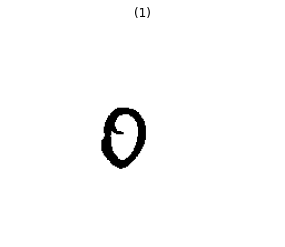

244 1965
196 2778


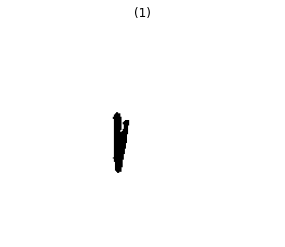

247 1965
198 2778


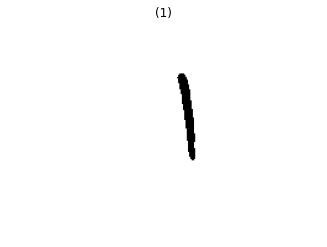

256 1965
178 2778


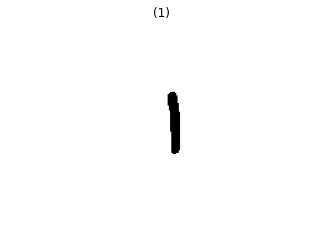

249 1965
175 2778


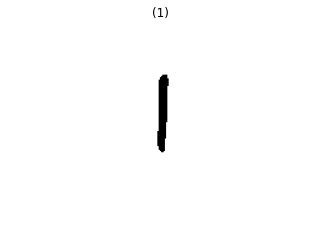

245 1965
174 2778


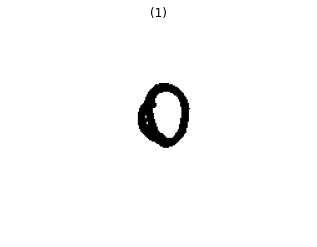

244 1965
175 2778


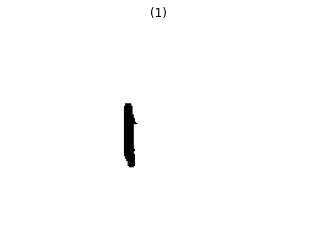

247 1965
177 2778


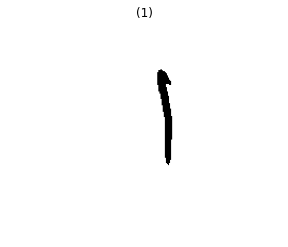

257 1965
204 2778


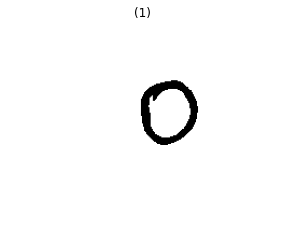

251 1965
202 2778


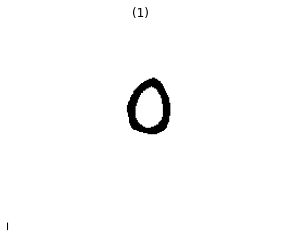

246 1965
200 2778


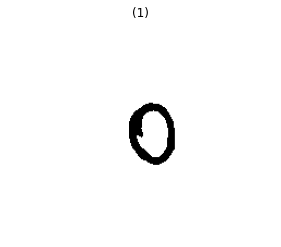

246 1965
200 2778


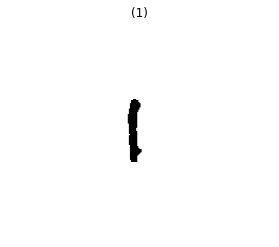

249 1965
204 2778


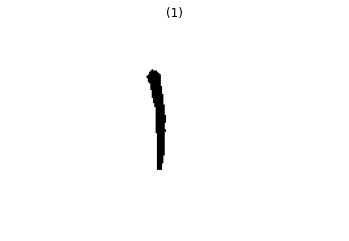

257 1965
162 2778


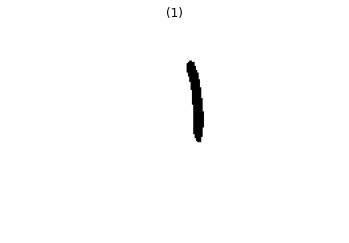

250 1965
159 2778


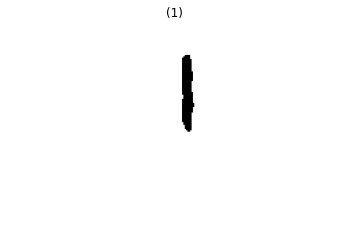

245 1965
156 2778


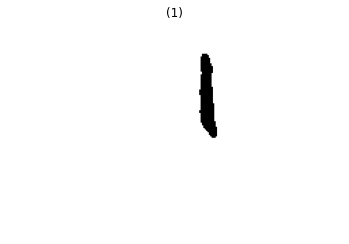

244 1965
156 2778


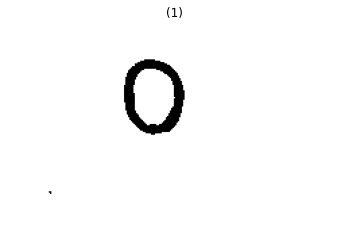

249 1965
156 2778


TypeError: only size-1 arrays can be converted to Python scalars

In [50]:
image = cv2.imread("./test_images/t27.jpg")

result = solve_expression(image, is_table=True, showTrace=True)

# for r in result: 
#     print(r)


